In [3]:
!pip install tensorflow_datasets

  Using cached tensorflow_datasets-4.9.2-py3-none-any.whl (5.4 MB)
  Using cached array_record-0.4.0-py38-none-any.whl (3.0 MB)
  Using cached promise-2.3-py3-none-any.whl
  Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
  Using cached tensorflow_metadata-1.14.0-py3-none-any.whl (28 kB)
  Using cached dm_tree-0.1.8-cp38-cp38-win_amd64.whl (101 kB)
  Using cached googleapis_common_protos-1.63.0-py2.py3-none-any.whl (229 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Attempting uninstall: absl-py
    Found existing installation: absl-py 2.1.0
    Uninstalling absl-py-2.1.0:
      Successfully uninstalled absl-py-2.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
-ensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.12.0 which is incompatible.
-ensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.12.3 which is incompatible.
-ensorflow-intel 2.13.0 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 2.12.0 which is incompatible.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt



In [4]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0



170498071/170498071 [==============================] - 294s 2us/step


In [5]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [6]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.5408 - accuracy: 0.4354 - val_loss: 1.2957 - val_accuracy: 0.5416
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1725 - accuracy: 0.5844 - val_loss: 1.1124 - val_accuracy: 0.6018
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0228 - accuracy: 0.6410 - val_loss: 1.0399 - val_accuracy: 0.6354
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9282 - accuracy: 0.6752 - val_loss: 0.9821 - val_accuracy: 0.6570
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8522 - accuracy: 0.7005 - val_loss: 0.8931 - val_accuracy: 0.6845
Epoch 6/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.7927 - accuracy: 0.7215 - val_loss: 0.8752 - val_accuracy: 0.6952
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7437 - accuracy: 0.7394 - val_loss: 0.8848 -

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.8446 - accuracy: 0.7189
Test accuracy: 0.7189000248908997


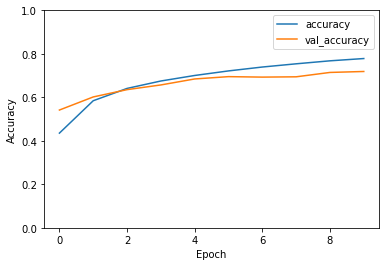

In [9]:

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix


In [11]:
test_predictions = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(cm)

313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[778  11  49   7  30   6   6  14  76  23]
 [ 31 830   4   3   7   3   9   3  37  73]
 [ 64   4 602  35 105  69  58  45  12   6]
 [ 26   7  94 425  90 195  68  54  22  19]
 [ 19   5  51  35 709  32  62  73  10   4]
 [ 18   4  61  99  56 652  32  64   9   5]
 [  9   5  51  32  44  27 810  11   4   7]
 [ 16   2  30   8  60  62   6 799   4  13]
 [ 74  22  12   7   8   5   3  13 840  16]
 [ 47  97  11   5   7   8  11  24  46 744]]


In [12]:
import seaborn as sns

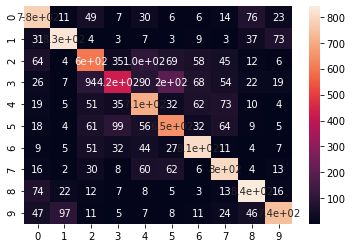

In [ ]:
sns.heatmap(cm,annot=True)
plt.show()